# Some descriptive statistics on the database

## 1. Univariate statistics

To create the index, we selected a few health variables available in the database. In this notebook, we will compute some descriptive statistics on these variables.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import seaborn as sns

First, we import the database that includes health variables and the names of the variables.

In [2]:
data = pd.read_csv("data_02.csv", low_memory=False)

In [3]:
var_names = pd.read_csv("data_names_var_index.csv")

In [4]:
var_names = var_names.drop(index=12).reset_index(drop=True) # We drop the variable RwSTATUS

RwAGEY_B = dict(zip(var_names.columns, ["cont"]+[f"R{wave}AGEY_B" for wave in range(1,15)]))
var_names = var_names.append(RwAGEY_B, ignore_index=True) # We add the age variable, as it is interesting

C:\Users\julie\AppData\Local\Temp\ipykernel_4160\375082379.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  var_names = var_names.append(RwAGEY_B, ignore_index=True) # We add the age variable, as it is interesting


Let us gather the health variables used to create the index.

Categorical variables:

    RwHOMCAR: indicates whether the Respondent reports any home health care in the reference period. '1' for 'yes', '0' for 'no'.

    RwHIBP: indicates whether the Respondent presents High blood pressure or hypertension. '1' for 'yes', '0' for 'no'.

    RwCANCR: indicates whether the Respondent presents a cancer of any kind. '1' for 'yes', '0' for 'no'.

    RwLUNG: indicates whether the Respondent presents a chronic lung disease. '1' for 'yes', '0' for 'no'.

    RwDIAB: indicates whether the Respondent presents diabete or high blood sugar. '1' for 'yes', '0' for 'no'.

    RwHEART: indicates whether the Respondent presents heart-related problems. '1' for 'yes', '0' for 'no'.

    RwSTROK: indicates whether the Respondent presents stroke or transient ischemic attack. '1' for 'yes', '0' for 'no'.

    RwPSYCH: indicates whether the Respondent presents emotional, nervous or psychiatric problems. '1' for 'yes', '0' for 'no'.

    RwARTHR: indicates whether the Respondent presents arthritis or rheumatism. '1' for 'yes', '0' for 'no'.

    RwBACK: indicates whether the Respondent reports back problems. '1' for 'yes', '0' for 'no'.

    RwDRINK: indicates whether the Respondent drinks any alcool. '1' for 'yes', '0' for 'no'.

    RwSMOKEN: indicates whether the Respondent smokes any cigarette now. '1' for 'yes', '0' for 'no'.

    RwDEPRES, RwEFFORT, RwSLEEPR, RwWHAPPY, RwFLONE, RwFSAD, RwGOING, and RwENLIFE are yes/no indicators of the Respondent’s feelings much of the time over the week prior to the interview. '1' for 'yes', '0' for 'no'.

    RwVIGACT indicate whether the Respondent participates in vigorous physical activity at least 3 times a week. '1' for 'yes', '0' for 'no'.

    RwSLFMEM: provides a measure of self reported general rating of memory, from 1 being the best to 5 being the worst rating.

Quantitative variables:

    RwHSPTIM: provides the number of overnight stays at the hospital since the last interview.
    RwNRSTIM: provides the number of overnight nursing home stays since the last interview.
    RwDOCTIM: provides the number of doctor visits since the last interview.
    RwBMI: provides Body Mass Index of the respondent.
    RwAGEY_B: provides the age in years of the respondent.

In [5]:
var_names.shape

(27, 15)

In [6]:
health_variables = list(var_names.drop(columns="CAT_CONT").values.flatten())
health_data = data[["HHIDPN"] + health_variables]

In [7]:
quant_health_var = np.array(var_names[var_names["CAT_CONT"] == "cont"].values)
quant_health_var = np.delete(quant_health_var,0,1)

binary_health_var = np.array(var_names[var_names["CAT_CONT"] == "cat"].values)
binary_health_var = np.delete(binary_health_var,0,1)
binary_health_var = np.delete(binary_health_var,12,0) # this variable is not binary

In [8]:
health_data.head()

,HHIDPN,R1HOMCAR,R2HOMCAR,R3HOMCAR,R4HOMCAR,R5HOMCAR,R6HOMCAR,R7HOMCAR,R8HOMCAR,R9HOMCAR,...,R5AGEY_B,R6AGEY_B,R7AGEY_B,R8AGEY_B,R9AGEY_B,R10AGEY_B,R11AGEY_B,R12AGEY_B,R13AGEY_B,R14AGEY_B
0,1010,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,64.0,66.0,68.0,70.0,72.0,74.0,76.0,NaN,NaN,NaN
3,3020,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,61.0,63.0,65.0,67.0,69.0,72.0,73.0,75.0,NaN,NaN
4,10001010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,62.0,64.0,66.0,69.0,71.0,72.0,74.0,76.0,NaN


In [9]:
quant_var_names = ["Overnight stays at the hospital", "Overnight nursing home stays", "Doctor visits", "BMI"]

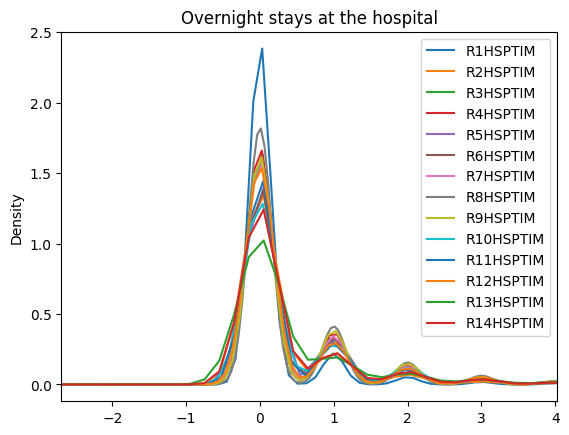

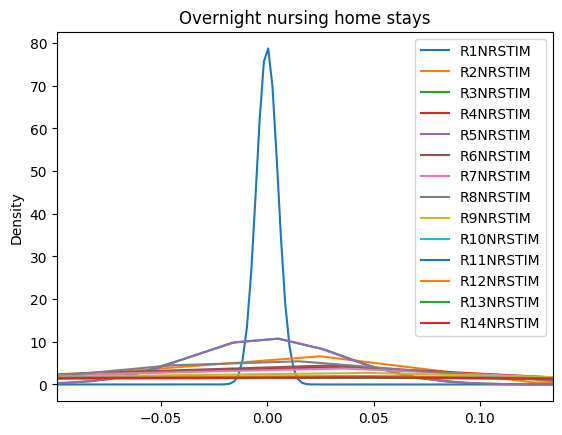

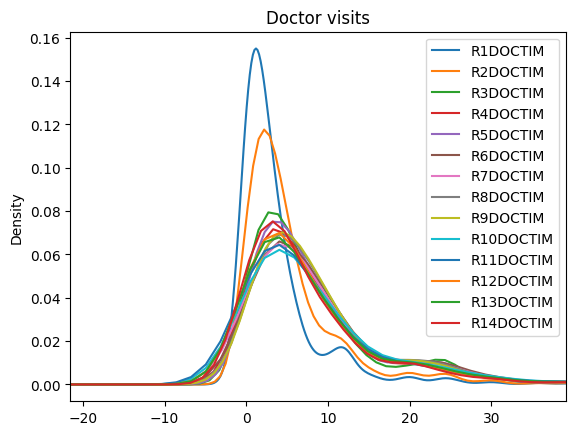

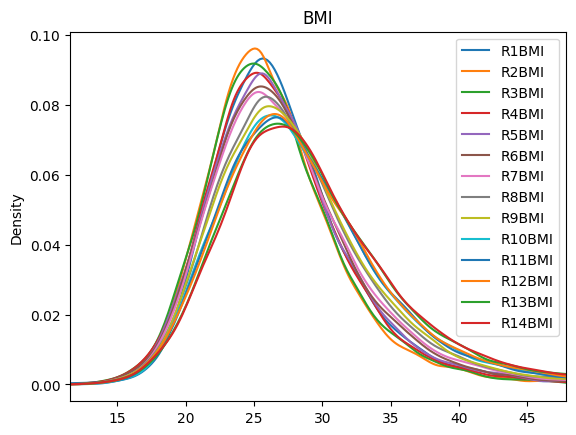

In [10]:
for i in range(len(quant_health_var)-1):
    mean = health_data[quant_health_var[i,0]].mean()
    std = health_data[quant_health_var[i,0]].std()
    health_data[quant_health_var[i,:]].plot.density()
    plt.xlim(mean-3*std,mean+4*std)
    plt.title(quant_var_names[i])
    plt.show()

For a variable to be interesting in the creation of the index, it needs to be able to differentiate individuals to a certain extent. Formally, the dispersion of the values must be sufficient. We look at the standard deviation of the variables. If it is too close to 0, it means that most individuals have the same value for this variable, and it is not helpful to point out differences.
Regarding the quantitative variables, the distributions show that the standard deviations are satisfying. For example, for the BMI in wave 1, the standard deviation is 5.18, with 75% of values between 12.8 and 29.6.
Regarding the variables NRSTIM, which represents the number of overnight stays in a nursing home, the graph is ambiguous: for wave 1, the standard deviation is very low so the densities for the others waves a flattened. Let's exclude the first wave for this variable:

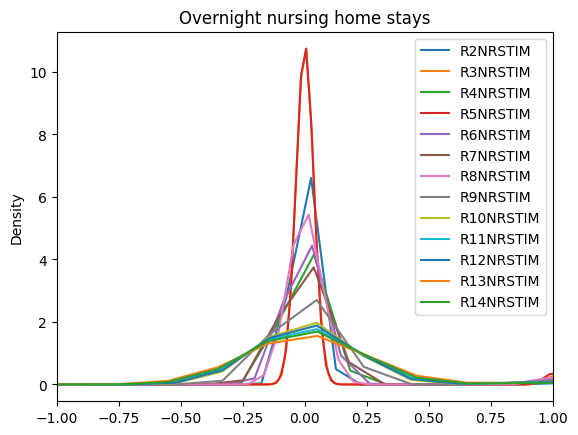

In [11]:
mean = health_data[quant_health_var[1,0]].mean()
std = health_data[quant_health_var[1,0]].std()
health_data[quant_health_var[1,1:]].plot.density()
plt.xlim(-1,1)
plt.title("Overnight nursing home stays")
plt.show()

When we exclude the first wave, the standard deviations for this variable are more satisfying.

Now let's look at the binary variables: we look at the dispersion of the values, just like with quantitative variables.
In the dataset, categorical variables are not indicated as such, such we define a function to compute the standard deviation of a binary variable with the formula $\sqrt{p(1-p)}$.

In [12]:
def std_binary(variable):
    mean = variable.mean()
    return np.sqrt(mean*(1-mean))

In [13]:
cat_var_names = ["Home health care", "Hypertension", "Diabetes", "Cancer", "Chronic lung disease", "Heart-related problems", "Stroke or transient ischemic attack", "Emotional, nervous or psychiatric problems", "Arthrisis or rhumatism", "Back problems", "Alcohol consumption", "Smoker", "Effort", "Sleep", "Happiness", "Loneliness", "Sadness", "Going", "Enlife", "Memory"] #chercher les significations

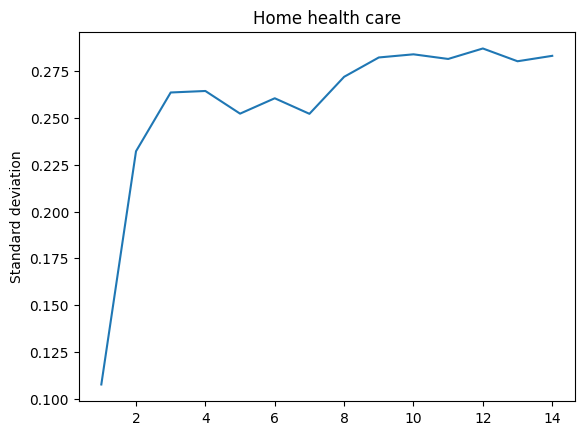

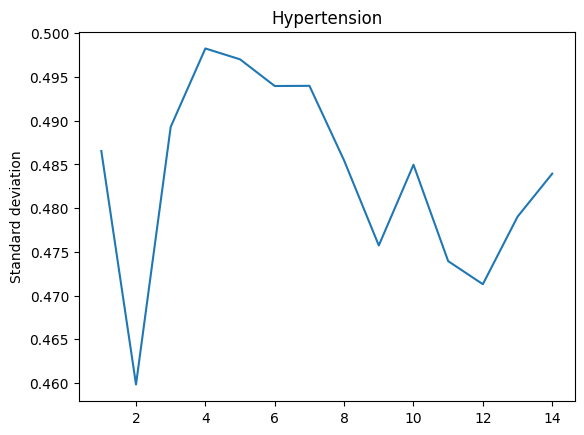

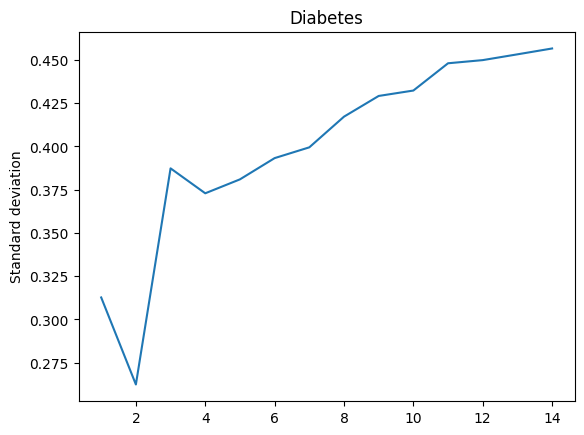

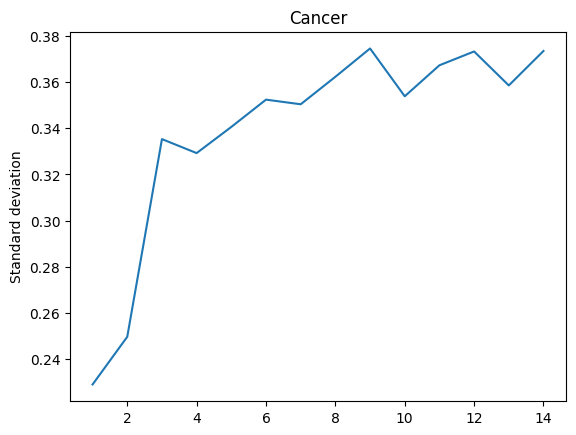

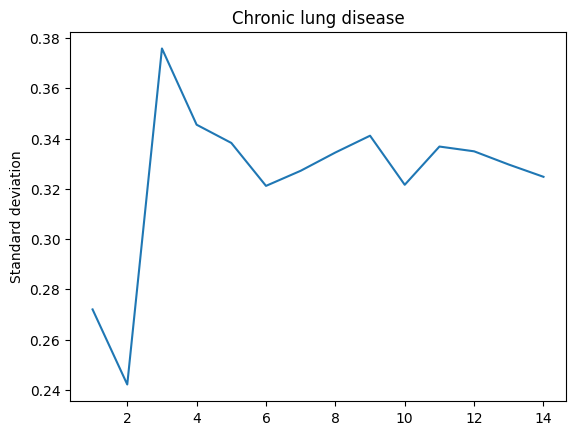

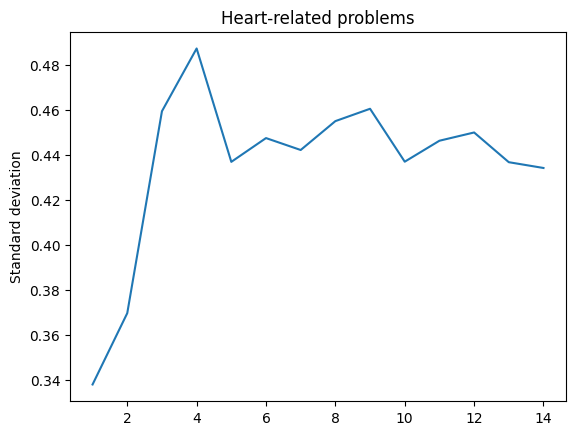

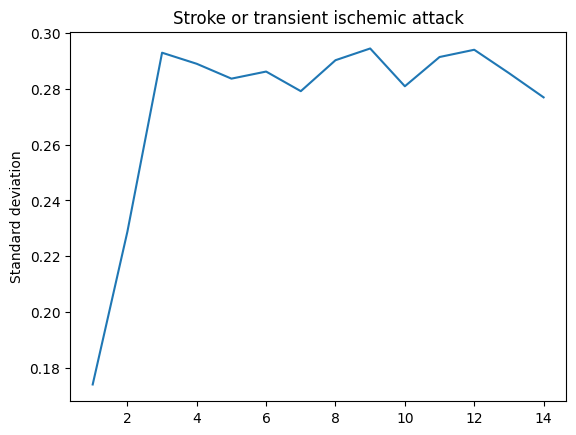

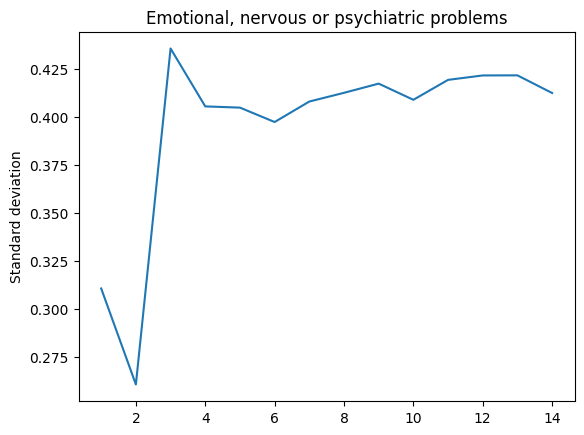

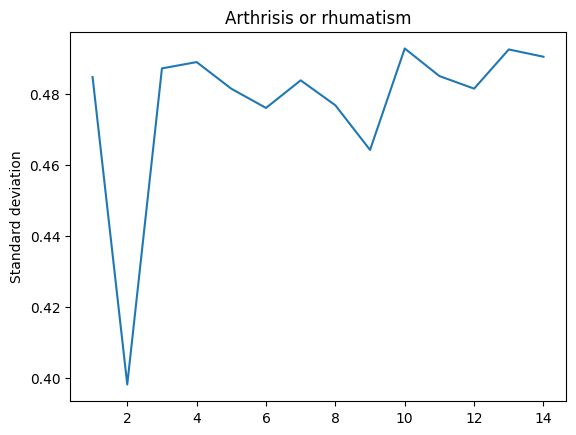

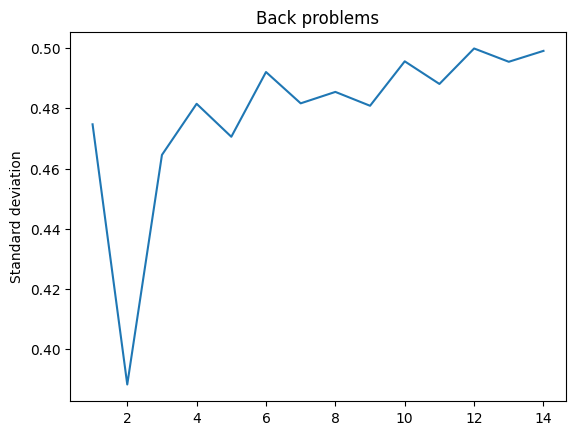

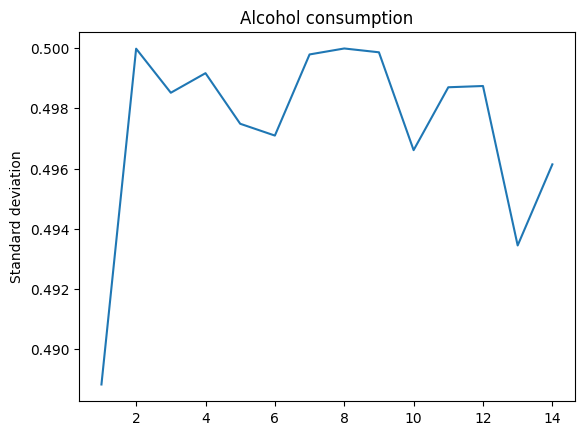

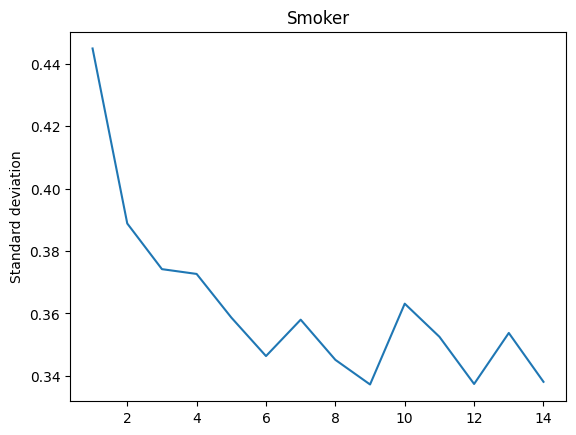

C:\Users\julie\AppData\Local\Temp\ipykernel_4160\1765230529.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mean*(1-mean))


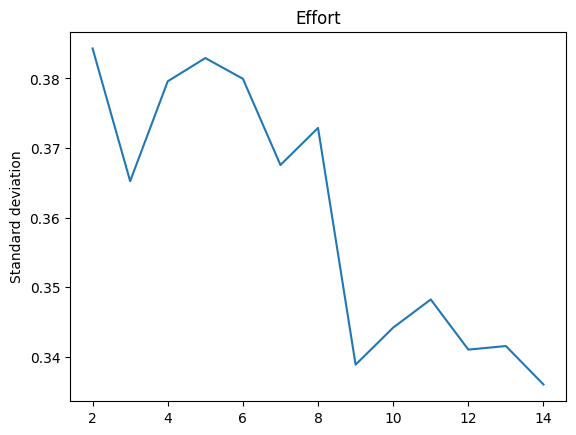

C:\Users\julie\AppData\Local\Temp\ipykernel_4160\1765230529.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mean*(1-mean))


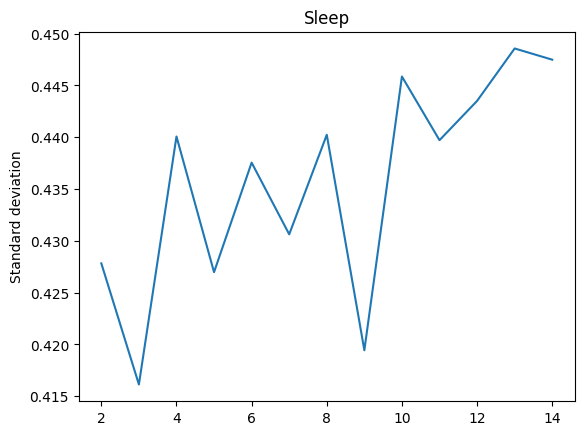

C:\Users\julie\AppData\Local\Temp\ipykernel_4160\1765230529.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mean*(1-mean))


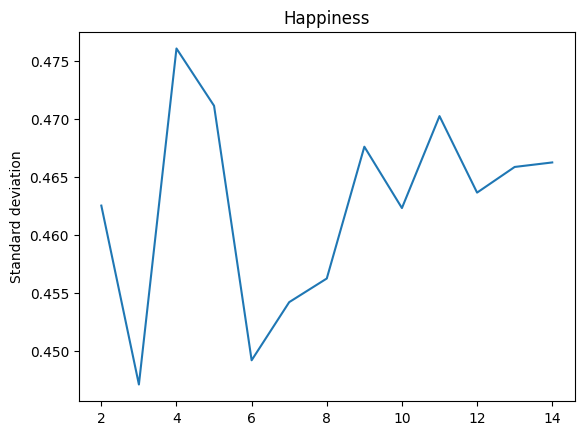

C:\Users\julie\AppData\Local\Temp\ipykernel_4160\1765230529.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mean*(1-mean))


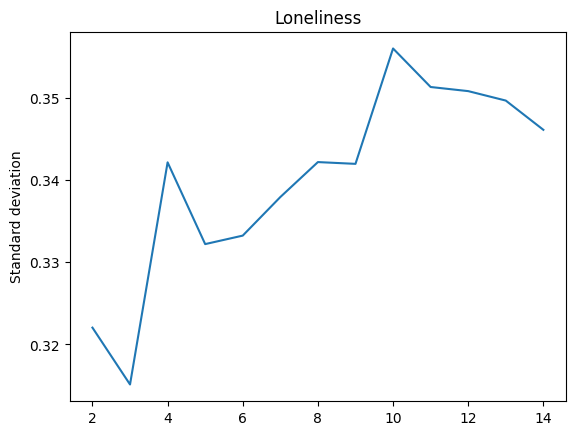

C:\Users\julie\AppData\Local\Temp\ipykernel_4160\1765230529.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mean*(1-mean))


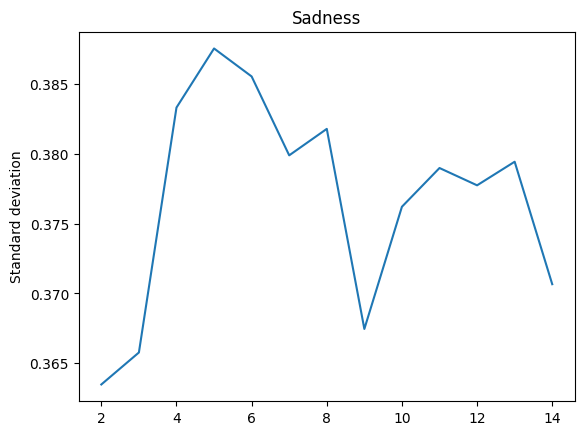

C:\Users\julie\AppData\Local\Temp\ipykernel_4160\1765230529.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mean*(1-mean))


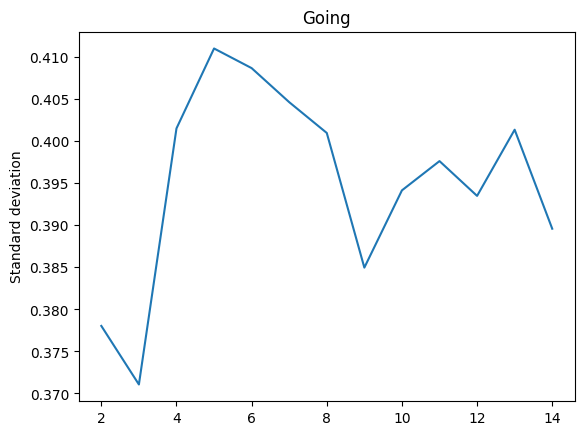

C:\Users\julie\AppData\Local\Temp\ipykernel_4160\1765230529.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mean*(1-mean))


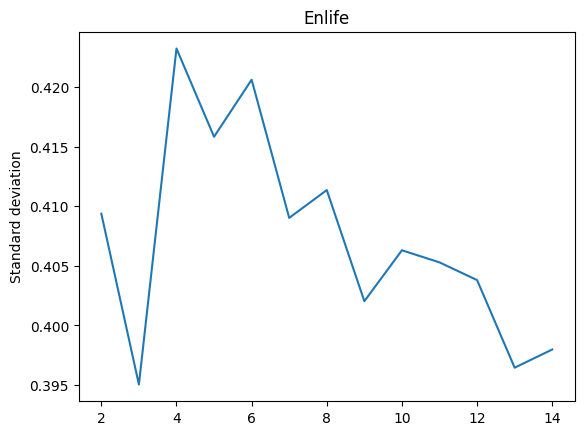

C:\Users\julie\AppData\Local\Temp\ipykernel_4160\1765230529.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mean*(1-mean))


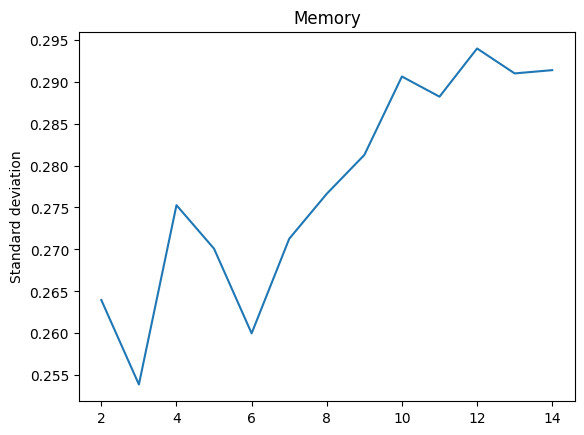

In [14]:
for var in range(len(binary_health_var)-1): #the last variable is not binary
    x = np.arange(1,15)
    std = health_data[binary_health_var[var,:]].apply(std_binary)
    plt.plot(x,std)
    plt.ylabel("Standard deviation")
    plt.title(cat_var_names[var])
    plt.show()

The standard deviations are satisfying, considering the fact that values are 0 or 1.

Now let's look at the variable RwSLFMEM which is a rating of the memory.

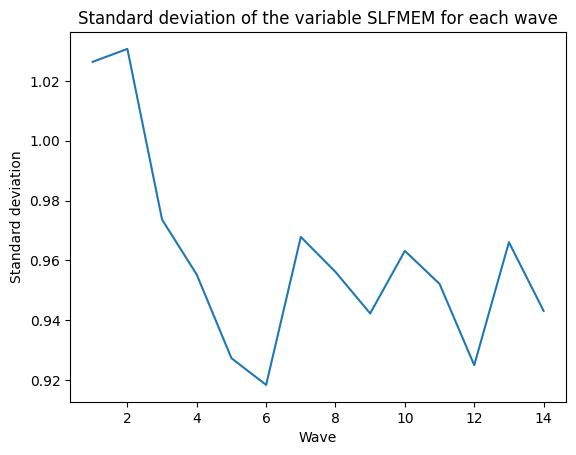

In [17]:
SLFMEM = [f"R{w}SLFMEM" for w in range(1,15)]
x = np.arange(1,15)
std = health_data[SLFMEM].std()
plt.plot(x,std)
plt.xlabel("Wave")
plt.ylabel("Standard deviation")
plt.title("Standard deviation of the variable SLFMEM for each wave")
plt.show()

The standard deviation is satisfying as well.

## 2. Bivariate statistics

### 2.1. Qualitative variables

To study the dependency between qualitative variables, we use contingency tables and $\chi ^2$ tests.
Since there are a lot of tests to run, we only study wave 1.

In [28]:
num_tests = 0
pvalues = []
for i in range(len(binary_health_var)-1):
    for j in range(len(binary_health_var)-1):
        if i != j:
            num_tests += 1
            data_crosstab = pd.crosstab(health_data[binary_health_var[i,0]], health_data[binary_health_var[j,0]], margins = False)
            print(data_crosstab)
            chi2, pvalue, degrees, expected = chi2_contingency(data_crosstab)
            print("pvalue = " + str(pvalue))
            pvalues.append(pvalue)
            print("\n")

R1HIBP     0.0   1.0
R1HOMCAR            
0.0       7717  4770
1.0         58    90
pvalue = 3.097156573214091e-08


R1DIAB      0.0   1.0
R1HOMCAR             
0.0       11147  1340
1.0          98    50
pvalue = 1.6649978114661972e-18


R1CANCR     0.0  1.0
R1HOMCAR            
0.0       11822  665
1.0         112   36
pvalue = 6.405744574898066e-23


R1LUNG      0.0  1.0
R1HOMCAR            
0.0       11507  980
1.0         111   37
pvalue = 7.844840017602942e-14


R1HEART     0.0   1.0
R1HOMCAR             
0.0       10876  1611
1.0          94    54
pvalue = 9.520175387572057e-17


R1STROK     0.0  1.0
R1HOMCAR            
0.0       12129  358
1.0         112   36
pvalue = 7.212750729157415e-49


R1PSYCH     0.0   1.0
R1HOMCAR             
0.0       11150  1337
1.0         119    29
pvalue = 0.0008737659837875281


R1ARTHR    0.0   1.0
R1HOMCAR            
0.0       7793  4694
1.0         77    71
pvalue = 0.012233906968517125


R1BACK     0.0   1.0
R1HOMCAR            
0.0       

R1BACK    0.0   1.0
R1CANCR            
0.0      7884  4065
1.0       429   274
pvalue = 0.008062892984343779


R1DRINK   0.0   1.0
R1CANCR            
0.0      4721  7228
1.0       275   428
pvalue = 0.8676214649934719


R1SMOKEN   0.0   1.0
R1CANCR             
0.0       8716  3233
1.0        498   205
pvalue = 0.2399494685808914


R1DEPREX  1.0  2.0   3.0   4.0
R1CANCR                       
0.0       271  343  2902  8433
1.0        27   28   188   460
pvalue = 0.0030298309175020434


R1EFFORX  1.0  2.0   3.0   4.0
R1CANCR                       
0.0       577  913  2902  7557
1.0        49   58   188   408
pvalue = 0.01187311307431817


R1SLEEPX  1.0  2.0   3.0   4.0
R1CANCR                       
0.0       626  932  4160  6231
1.0        66   79   240   318
pvalue = 4.7505798776364906e-08


R1WHAPPX   1.0   2.0   3.0  4.0
R1CANCR                        
0.0       4047  5437  2067  398
1.0        218   310   133   42
pvalue = 0.001011119355865779


R1FLONEX  1.0  2.0   3.0   4.0
R1C

pvalue = 0.0008737659837875281


R1HIBP    0.0   1.0
R1PSYCH            
0.0      7130  4153
1.0       654   715
pvalue = 2.324561548039268e-28


R1DIAB     0.0   1.0
R1PSYCH             
0.0      10111  1172
1.0       1151   218
pvalue = 8.223863467123428e-10


R1CANCR    0.0  1.0
R1PSYCH            
0.0      10686  597
1.0       1263  106
pvalue = 0.0002358859361967248


R1LUNG     0.0  1.0
R1PSYCH            
0.0      10496  787
1.0       1138  231
pvalue = 9.519679092988953e-37


R1HEART   0.0   1.0
R1PSYCH            
0.0      9941  1342
1.0      1045   324
pvalue = 7.98758791146953e-34


R1STROK    0.0  1.0
R1PSYCH            
0.0      10968  315
1.0       1289   80
pvalue = 1.4552006294919655e-09


R1ARTHR   0.0   1.0
R1PSYCH            
0.0      7266  4017
1.0       614   755
pvalue = 6.46130092857336e-45


R1BACK    0.0   1.0
R1PSYCH            
0.0      7669  3614
1.0       644   725
pvalue = 2.435979583813925e-53


R1DRINK   0.0   1.0
R1PSYCH            
0.0      4297  6986


R1FLONEX  1.0  2.0   3.0   4.0
R1DRINK                       
0.0       140  181  1010  3665
1.0       109  177  1367  6003
pvalue = 2.264710765701031e-14


R1FSADX  1.0  2.0   3.0   4.0
R1DRINK                      
0.0      117  164  1569  3146
1.0       85  181  2183  5207
pvalue = 1.3977346965193347e-12


R1GOINGX  1.0  2.0   3.0   4.0
R1DRINK                       
0.0       214  318  1708  2756
1.0       198  322  2329  4807
pvalue = 5.517726534804992e-21


R1ENLIFX   1.0   2.0  3.0  4.0
R1DRINK                       
0.0       2646  1590  585  175
1.0       4034  2769  722  131
pvalue = 1.6616910196080872e-15


R1HOMCAR   0.0  1.0
R1SMOKEN           
0.0       9091  113
1.0       3396   35
pvalue = 0.38335303687746447


R1HIBP     0.0   1.0
R1SMOKEN            
0.0       5539  3675
1.0       2245  1193
pvalue = 1.0874257873549148e-07


R1DIAB     0.0   1.0
R1SMOKEN            
0.0       8165  1049
1.0       3097   341
pvalue = 0.02065512771024867


R1CANCR    0.0  1.0
R1SMOKEN  

R1GOINGX  1.0  2.0   3.0   4.0
R1EFFORX                      
1.0       160   94   158   214
2.0        77  208   384   302
3.0        86  237  1734  1033
4.0        89  101  1761  6014
pvalue = 0.0


R1ENLIFX   1.0   2.0  3.0  4.0
R1EFFORX                      
1.0        325   123   89   89
2.0        383   325  199   64
3.0       1115  1268  620   87
4.0       4857  2643  399   66
pvalue = 0.0


R1HOMCAR   0.0  1.0
R1SLEEPX           
1.0        658   32
2.0        988   21
3.0       4350   46
4.0       6491   49
pvalue = 2.8145172847842983e-19


R1HIBP     0.0   1.0
R1SLEEPX            
1.0        320   372
2.0        522   489
3.0       2613  1787
4.0       4329  2220
pvalue = 4.972796171340356e-38


R1DIAB     0.0  1.0
R1SLEEPX           
1.0        551  141
2.0        856  155
3.0       3911  489
4.0       5944  605
pvalue = 4.637793157245313e-22


R1CANCR    0.0  1.0
R1SLEEPX           
1.0        626   66
2.0        932   79
3.0       4160  240
4.0       6231  318
pvalue = 4.7

R1DRINK    0.0   1.0
R1FLONEX            
1.0        140   109
2.0        181   177
3.0       1010  1367
4.0       3665  6003
pvalue = 2.264710765701031e-14


R1SMOKEN   0.0   1.0
R1FLONEX            
1.0        145   104
2.0        222   136
3.0       1671   706
4.0       7176  2492
pvalue = 4.596853173880204e-14


R1DEPREX  1.0  2.0   3.0   4.0
R1FLONEX                      
1.0       100   49    55    45
2.0        39   71   177    71
3.0        69  124  1251   933
4.0        90  127  1607  7844
pvalue = 0.0


R1EFFORX  1.0  2.0   3.0   4.0
R1FLONEX                      
1.0        99   58    51    41
2.0        46  112   123    77
3.0       140  270   976   991
4.0       341  531  1940  6856
pvalue = 0.0


R1SLEEPX  1.0  2.0   3.0   4.0
R1FLONEX                      
1.0        95   55    49    50
2.0        64  111   112    71
3.0       174  288  1095   820
4.0       359  557  3144  5608
pvalue = 0.0


R1WHAPPX   1.0   2.0   3.0  4.0
R1FLONEX                       
1.0         33 

R1CANCR    0.0  1.0
R1ENLIFX           
1.0       6303  377
2.0       4135  224
3.0       1229   78
4.0        282   24
pvalue = 0.17059103010862992


R1LUNG     0.0  1.0
R1ENLIFX           
1.0       6221  459
2.0       4008  351
3.0       1152  155
4.0        253   53
pvalue = 6.817015227056862e-16


R1HEART    0.0  1.0
R1ENLIFX           
1.0       5872  808
2.0       3799  560
3.0       1079  228
4.0        236   70
pvalue = 1.6327755065829938e-11


R1STROK    0.0  1.0
R1ENLIFX           
1.0       6503  177
2.0       4230  129
3.0       1244   63
4.0        280   26
pvalue = 3.482562490481336e-10


R1PSYCH    0.0  1.0
R1ENLIFX           
1.0       6226  454
2.0       3902  457
3.0        969  338
4.0        186  120
pvalue = 6.476122124442223e-146


R1ARTHR    0.0   1.0
R1ENLIFX            
1.0       4303  2377
2.0       2736  1623
3.0        692   615
4.0        149   157
pvalue = 1.6308917626928139e-18


R1BACK     0.0   1.0
R1ENLIFX            
1.0       4597  2083
2.0       28

In [34]:
# Tests with the variable SLFMEM
for i in range(len(binary_health_var)-1):
    if i != j:
        num_tests += 1
        data_crosstab = pd.crosstab(health_data[binary_health_var[i,0]], health_data["R1SLFMEM"], margins = False)
        print(data_crosstab)
        chi2, pvalue, degrees, expected = chi2_contingency(data_crosstab)
        print("pvalue = " + str(pvalue))
        pvalues.append(pvalue)
        print("\n")

R1SLFMEM   1.0   2.0   3.0   4.0  5.0
R1HOMCAR                             
0.0       2281  4234  3468  1436  322
1.0         14    28    31    36   19
pvalue = 1.89079990187585e-21


R1SLFMEM   1.0   2.0   3.0  4.0  5.0
R1HIBP                              
0.0       1508  2742  2143  763  149
1.0        789  1523  1362  711  193
pvalue = 1.6995398358768625e-28


R1SLFMEM   1.0   2.0   3.0   4.0  5.0
R1DIAB                               
0.0       2114  3859  3136  1192  274
1.0        183   406   369   282   68
pvalue = 2.4404025611564068e-33


R1SLFMEM   1.0   2.0   3.0   4.0  5.0
R1CANCR                              
0.0       2178  4026  3315  1390  321
1.0        119   239   190    84   21
pvalue = 0.9152941410645461


R1SLFMEM   1.0   2.0   3.0   4.0  5.0
R1LUNG                               
0.0       2155  3978  3216  1291  286
1.0        142   287   289   183   56
pvalue = 8.127033203642741e-19


R1SLFMEM   1.0   2.0   3.0   4.0  5.0
R1HEART                              
0.0  

In [35]:
def test_chi2(pval):
    return pval <= 0.01
print(sum(test_chi2(pval) for pval in pvalues))
num_tests

366


399

Out of the 399 $\chi ^2$ tests we ran, 366 showed a dependency between the two variables with a 1% threshold.

### 2.2. Quantitative variables

For quantitative variables, we study linear correlations (only for wave 1).

In [66]:
health_data[quant_health_var[:,6]].corr(method='pearson')

,R7HSPTIM,R7NRSTIM,R7DOCTIM,R7BMI,R7AGEY_B
R7HSPTIM,1.000000,0.086693,0.210111,-0.000672,0.113875
R7NRSTIM,0.086693,1.000000,0.048861,-0.031972,0.100094
R7DOCTIM,0.210111,0.048861,1.000000,0.036052,0.058203
R7BMI,-0.000672,-0.031972,0.036052,1.000000,-0.216047
R7AGEY_B,0.113875,0.100094,0.058203,-0.216047,1.000000


### 2.3. Qualitative and quantitative variables

To study the dependency between a qualitative and a quantitative variable, we use the correlation ratio.
Source: https://www.alliage-ad.com/data-science/comment-etudier-la-liaison-entre-une-variable-quantitative-et-une-variable-qualitative/

In [52]:
def corr_ratio(x,y):
    # x is a qualitative variable
    # y is a quantitative variable
    s = 0
    for factor in x.value_counts().index:
        ind = x[x == factor].dropna(axis=0).index
        classe = y.iloc[ind,]
        s = s + len(classe)*np.sum((np.mean(classe)-np.mean(y))**2)
        y_range = np.sum((y-np.mean(y))**2)
        cr = s/y_range
        return cr

In [53]:
corr_ratio(health_data[binary_health_var[0,0]], health_data[quant_health_var[0,0]])

0.00040853397309086737

In [61]:
corr_ratios = []
num_tests = 0
for i in range(len(binary_health_var)-1):
    for j in range(len(quant_health_var)-1):
        num_tests += 1
        corr_ratios.append(corr_ratio(health_data[binary_health_var[i,2]], health_data[quant_health_var[j,2]]))

In [62]:
def test_corr(x):
    return x >= 0.1
print(sum(test_corr(corr) for corr in corr_ratios))
num_tests

0


80